In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inputation

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Features Classification

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_df['Survived'] = train_df['Survived'].astype('category')
features = ['Pclass', 'Parch', 'SibSp', 'Sex', 'Embarked']
def convert(df, feature):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert(train_df, features)
convert(test_df, features)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of features

In [7]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [8]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Exploratory Data Analyst

### Correlating categorical features: Sex, Pclass, SibSp, Embarked, Parch
### Target variabe: Survival

In [9]:
train_df['Survived'].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [10]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


### Visualize categorical features

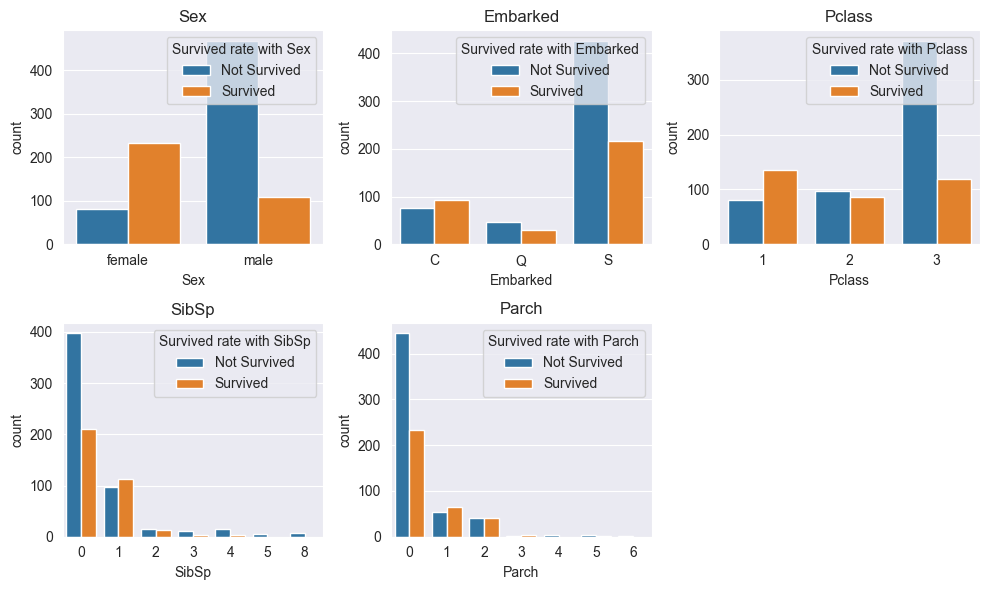

In [11]:
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (10,6))
ax[1,2].set_visible(False)
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', ax = ax_i)
            ax_i.set_title(cols[i])
            ax_i.legend(
                title=f'Survived rate with {cols[i]}',
                loc='upper right',
                labels=['Not Survived', 'Survived']
            )
plt.tight_layout()

### Obsevation:
#### It ís obvious that:
- The mortality rate among males was approximately twice as high as that of females.
- Passengers who embarked at Southampton and travelled in third class recorded the highest mortality rate, whereas those holding business-class tickets showed a higher survival rate compared to other fare categories.
- Passengers travelling alone or in small groups accounted for the majority and also experienced the highest mortality rate.

### EDA for numerical features

#### Age


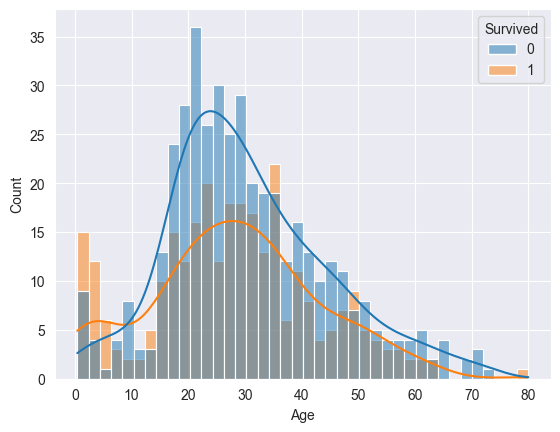

In [12]:
sns.histplot(data = train_df, x = 'Age', bins = 40, kde = True, hue = 'Survived');

#### Observation: People aged between 20 and 40 made up the largest proportion of passengers on the trip, and this age group also recorded the highest mortality rate.


#### Fare

In [13]:
train_df['Fare'].describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


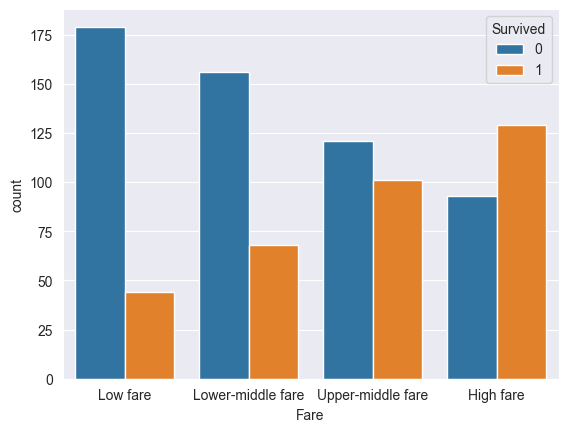

In [14]:
fare_category = ['Low fare', 'Lower-middle fare', 'Upper-middle fare', 'High fare']
fare_class = pd.qcut(train_df['Fare'], 4, labels = fare_category)
sns.countplot(data = train_df, x = fare_class, hue = 'Survived');

#### It can be observed that the survival rate of passengers increased steadily in line with the fare they paid.

### Feature Engineering and Data Wrangling

#### Feature Engineering
- Add new column 'Title' and 'FamilySize' from columns: SipSb and Parch

In [17]:
import re

def extract_title(name):
    m = re.search(r",\s*([^\.]+)\.", name)
    if m:
        return m.group(1)
    return None

train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

In [25]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title in ['Ms']:
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(group_title)
test_df['Title'] = test_df['Title'].apply(group_title)

train_df['Title'].value_counts()

Title
Others    890
Miss        1
Name: count, dtype: int64